<a href="https://colab.research.google.com/github/Samdersson/Percetron_Simple/blob/main/Perceptron_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1: Importar las bibliotecas necesarias

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#paso 2: cargar y procesar los datos

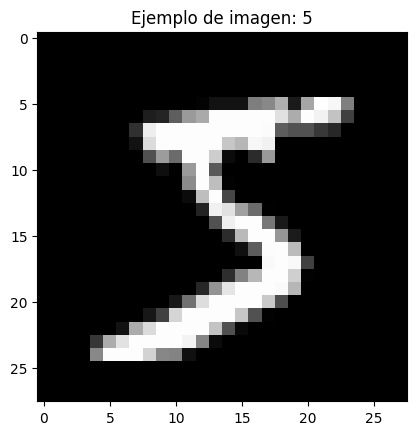

In [6]:
# cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalizar los datos (valores entre 0 Y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

#visualizar un ejemplo de los datos
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Ejemplo de imagen: {y_train[0]}')
plt.show()

#convertir las etiquetas a formato "one-hot" (10 categorias)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

#Paso 3 construir el modelo de percepcion

In [7]:
#crear el modelo del perseptor multicapa
model = Sequential()

#Aplanar las imagenes de 28x28 en un vector de 784
model.add(Flatten(input_shape=(28, 28)))

#añadir la primera capa oculta con 128 neuronas y activacion
model.add(Dense(128, activation='relu'))

#añadir la segunda capa oculta con 64 neuronas
model.add(Dense(64, activation='relu'))

#añadir la capa de salida con 10 neuronas (1 por cada digito)
model.add(Dense(10, activation='softmax'))

#añadir la capa de salida con 10 neuronas (una por clase)
model.add(Dense(10, activation='softmax'))

#compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#imprimir un resumen del modelo
model.summary()

#compilar el modelo con optimizador adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 109496 (427.72 KB)
Trainable params: 109496 (427.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Paso 4 Entrenar el modelo

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3124 - accuracy: 0.5627 - val_loss: 0.9130 - val_accuracy: 0.5924
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7894 - accuracy: 0.6040 - val_loss: 0.7108 - val_accuracy: 0.6088
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6807 - accuracy: 0.6209 - val_loss: 0.6617 - val_accuracy: 0.6105
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6226 - accuracy: 0.6973 - val_loss: 0.5947 - val_accuracy: 0.7498
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4433 - accuracy: 0.8716 - val_loss: 0.3741 - val_accuracy: 0.8854
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2806 - accuracy: 0.9535 - val_loss: 0.2412 - val_accuracy: 0.9701
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1680 - accuracy: 0.9808 - val_loss: 0.2345 - val_accuracy:

#PAso 5 Evaluar el modelo

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Precision en el conjunto de prueba: {test_accuracy: .4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1259 - accuracy: 0.9764
Precision en el conjunto de prueba:  0.9764


#PAso 6 visualizar los resultados

In [ ]:
#graficar la precision en entrenamiento y validacion

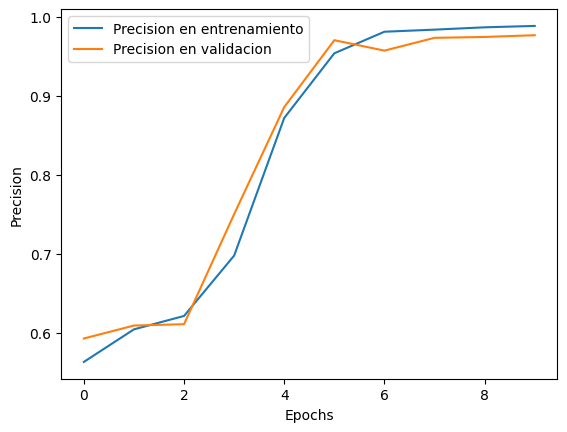

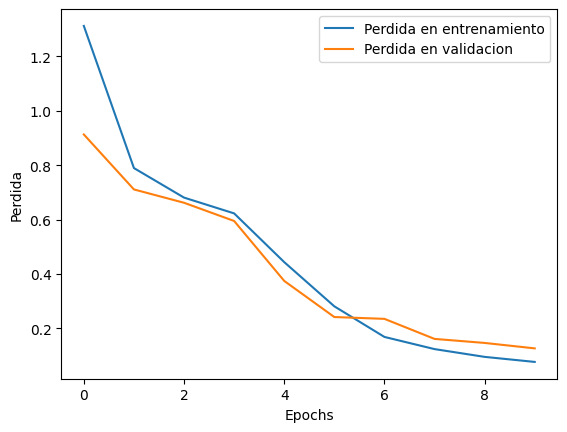

In [13]:
plt.plot(history.history['accuracy'], label='Precision en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precision en validacion')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

#graficar la perdida en entrenamiento y validacion
plt.plot(history.history['loss'], label='Perdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida en validacion')
plt.xlabel('Epochs')
plt.ylabel('Perdida')
plt.legend()